In [2]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#Here are the metrics I analyze for the campaign

#Clickthrough Rate. 
#Open Rate. 
#Conversion Rate. ...
#Bounce Rate. ...
#List Growth Rate. ...
#Overall ROI. ...
#Unsubscribe Rate.

In [3]:
#pulling in data to dataframe

df = pd.read_csv('filtered_dataset.csv')


In [4]:
#checking data for any needed wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42099 entries, 0 to 42098
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               42099 non-null  int64  
 1   name                42099 non-null  object 
 2   account_number      42099 non-null  int64  
 3   email_name          42099 non-null  object 
 4   sent_date           42099 non-null  object 
 5   open_date           34832 non-null  object 
 6   click_date          8693 non-null   object 
 7   bounce_date         649 non-null    object 
 8   transaction_date    902 non-null    object 
 9   transaction_amount  889 non-null    float64
dtypes: float64(1), int64(2), object(7)
memory usage: 3.2+ MB


In [5]:
#changing dtype for some columns

df = df.astype({'open_date':'datetime64', 'click_date':'datetime64', 
                'bounce_date':'datetime64', 'transaction_date':'datetime64', 
               'sent_date':'datetime64', 'name':'string', 'email_name':'string'})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42099 entries, 0 to 42098
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               42099 non-null  int64         
 1   name                42099 non-null  string        
 2   account_number      42099 non-null  int64         
 3   email_name          42099 non-null  string        
 4   sent_date           42099 non-null  datetime64[ns]
 5   open_date           34832 non-null  datetime64[ns]
 6   click_date          8693 non-null   datetime64[ns]
 7   bounce_date         649 non-null    datetime64[ns]
 8   transaction_date    902 non-null    datetime64[ns]
 9   transaction_amount  889 non-null    float64       
dtypes: datetime64[ns](5), float64(1), int64(2), string(2)
memory usage: 3.2 MB


In [131]:
#adding columns for day, month and year separately
df['month'] = pd.DatetimeIndex(df['sent_date']).month
df['year'] = pd.DatetimeIndex(df['sent_date']).year
df['day'] = pd.DatetimeIndex(df['sent_date']).day
df['hour'] = pd.DatetimeIndex(df['sent_date']).hour



In [7]:
#doing some EDA to get a better understanding of the data
#the company sent 4 emails 
df['email_name'].unique()

<StringArray>
[                                'Email 1 - Welcome to Wanderlust Adventures',
                                     'Email 2 - Offers tailored just for you',
 'Email 3 - Don’t miss out on your next adventures, book now and get 20% off',
                        'Email 4 - Thanks for choosing Wanderlust Adventures']
Length: 4, dtype: string

In [8]:
# the emails were sent to the following number of recipients
df.groupby('email_name')['name'].count()

email_name
Email 1 - Welcome to Wanderlust Adventures                                    10750
Email 2 - Offers tailored just for you                                        14332
Email 3 - Don’t miss out on your next adventures, book now and get 20% off    10747
Email 4 - Thanks for choosing Wanderlust Adventures                            6270
Name: name, dtype: int64

In [9]:
#number of unique email recipients 
df.name.nunique()

17916

In [10]:
#date of the first and last email sent 
print(df.sent_date.min(), df.sent_date.max())

2019-01-01 07:13:00 2023-08-31 23:22:00


In [11]:
#Creating functions to be used in ad hoc analysis
#Clickthrough Rate. 
def ctr_calc_total(email):
    total_emails = len(df[df['email_name'].str.contains( email)])
    opened_emails = len(df[df['email_name'].str.contains( 'Email 1') & df['open_date'].isnull() == True])
    return opened_emails/total_emails

def ctr_calc_MoM(email, current_month_var):
    months = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July': 7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
    current_month = months[current_month_var]
    total_emails = len(df[df['email_name'].str.contains(email) & (df['sent_date'].dt.month == current_month)])
    opened_emails = len(df[df['email_name'].str.contains(email) & (df['open_date'].isnull() == True) & (df['sent_date'].dt.month == current_month)])
    
    prev_total_emails = len(df[df['email_name'].str.contains(email) & (df['sent_date'].dt.month == current_month - 1)])
    prev_opened_emails = len(df[df['email_name'].str.contains(email) & (df['open_date'].isnull() == True) & (df['sent_date'].dt.month == current_month -1)])
    return {'date':current_month_var, 'month':opened_emails/total_emails, 
            'previous_month':prev_opened_emails/prev_total_emails, 
           '% change': round(((opened_emails-prev_opened_emails)/prev_total_emails) * 100, 2)}

def ctr_calc_MoM_PY(email, current_month_var, current_year):
    months = {'January': 1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
             'July': 7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
    current_month = months[current_month_var]
    total_emails = len(df[df['email_name'].str.contains(email) & (df['sent_date'].dt.month == current_month) & (df['sent_date'].dt.year == current_year)] )
    opened_emails = len(df[df['email_name'].str.contains(email) & (df['open_date'].isnull() == True) & (df['sent_date'].dt.month == current_month) & (df['sent_date'].dt.year == current_year) ])
    
    prev_total_emails = len(df[df['email_name'].str.contains(email) & (df['sent_date'].dt.month == current_month - 1) & (df['sent_date'].dt.year == current_year -1)])
    prev_opened_emails = len(df[df['email_name'].str.contains(email) & (df['open_date'].isnull() == True) & (df['sent_date'].dt.month == current_month -1) & (df['sent_date'].dt.year == current_year -1)])
    return {'Date': current_month_var + " " + str(current_year),  'current':opened_emails/total_emails, 'previous':prev_opened_emails/prev_total_emails}

def ctr_calc_YTD_PYTD(email):
    temp_date = pd.to_datetime(datetime.date.today())
    total_emails = len(df[df['email_name'].str.contains(email) & 
                          (df['sent_date'] <= temp_date)] )
    opened_emails = len(df[df['email_name'].str.contains(email) & 
                           (df['open_date'].isnull() == True) & 
                          (df['sent_date'] <= temp_date )  ])
    prev_total_emails = len(df[df['email_name'].str.contains(email) & 
                          (df['sent_date'] <= temp_date - relativedelta(years=1))] )
    prev_opened_emails = len(df[df['email_name'].str.contains(email) & 
                           (df['open_date'].isnull() == True) & 
                          (df['sent_date'] <= temp_date - relativedelta(years=1))  ])
    return {'Date': datetime.date.today().year, 
            'current':opened_emails/total_emails, 
            'previous':prev_opened_emails/prev_total_emails}

In [129]:
print(df.groupby(['email_name', 'year'])['open_date'].count())
print(df.groupby('email_name')['sent_date'].count())


email_name
Email 1 - Welcome to Wanderlust Adventures                                     9139
Email 2 - Offers tailored just for you                                        12563
Email 3 - Don’t miss out on your next adventures, book now and get 20% off     8308
Email 4 - Thanks for choosing Wanderlust Adventures                            4822
Name: open_date, dtype: int64
email_name
Email 1 - Welcome to Wanderlust Adventures                                    10750
Email 2 - Offers tailored just for you                                        14332
Email 3 - Don’t miss out on your next adventures, book now and get 20% off    10747
Email 4 - Thanks for choosing Wanderlust Adventures                            6270
Name: sent_date, dtype: int64


In [126]:
#lets get the clickthrough rate

#we need the total number of unique clicks
clicked = df.groupby('email_name')['open_date'].count()

#then you need the count of emails sent
sent = df.groupby('email_name')['sent_date'].count()

#loop to iterate over answers
for i in range(len(sent)):
    print(('Email {} clickthrough rate: {}').format(i+1, round(clicked[i]/sent[i], 2)))

Email 1 clickthrough rate: 0.85
Email 2 clickthrough rate: 0.88
Email 3 clickthrough rate: 0.77
Email 4 clickthrough rate: 0.77


In [133]:
#click through rate broken out by year
for i in range(2019,2023):
    opened_ = df[df.year == i].groupby('email_name')['open_date'].count()
    sent_ = df[df.year == i].groupby('email_name')['sent_date'].count()
    for j in range(len(opened_)):
        print("Year: ", i,"Email ", j+1,  "Sent: ", sent_[j], "opened: ", opened_[j],"clickthrough Rate: ", round(opened_[j]/sent_[j], 2))

Year:  2019 Email  1 Sent:  2271 opened:  1937 clickthrough Rate:  0.85
Year:  2019 Email  2 Sent:  3092 opened:  2717 clickthrough Rate:  0.88
Year:  2019 Email  3 Sent:  2336 opened:  1831 clickthrough Rate:  0.78
Year:  2019 Email  4 Sent:  1353 opened:  1028 clickthrough Rate:  0.76
Year:  2020 Email  1 Sent:  2345 opened:  1989 clickthrough Rate:  0.85
Year:  2020 Email  2 Sent:  3050 opened:  2677 clickthrough Rate:  0.88
Year:  2020 Email  3 Sent:  2264 opened:  1754 clickthrough Rate:  0.77
Year:  2020 Email  4 Sent:  1367 opened:  1042 clickthrough Rate:  0.76
Year:  2021 Email  1 Sent:  2235 opened:  1896 clickthrough Rate:  0.85
Year:  2021 Email  2 Sent:  3009 opened:  2643 clickthrough Rate:  0.88
Year:  2021 Email  3 Sent:  2239 opened:  1730 clickthrough Rate:  0.77
Year:  2021 Email  4 Sent:  1305 opened:  998 clickthrough Rate:  0.76
Year:  2022 Email  1 Sent:  2363 opened:  1983 clickthrough Rate:  0.84
Year:  2022 Email  2 Sent:  3115 opened:  2722 clickthrough Rate:

In [13]:
#to get the open rate you need the count of sent emails
sent = df.groupby('email_name')['sent_date'].count()

#you also need a count of open emails 
opened =df.groupby('email_name')['open_date'].count()

#loop to iterate over answers
for i in range(len(sent)):
    print(('Email {} open rate: {}').format(i+1, round(opened[i]/sent[i], 2)))


Email 1 open rate: 0.85
Email 2 open rate: 0.88
Email 3 open rate: 0.77
Email 4 open rate: 0.77


In [14]:
df.open_date.value_counts()

2021-06-12 17:07:00    2
2019-09-13 17:07:00    2
2019-01-02 22:48:00    2
2022-04-19 03:29:00    2
2021-07-20 16:10:00    2
                      ..
2020-12-29 14:10:00    1
2021-04-12 15:17:00    1
2023-02-07 05:58:00    1
2020-11-03 04:36:00    1
2020-07-12 16:21:00    1
Name: open_date, Length: 34585, dtype: int64

In [15]:
#conversion rate

#There are some rows with no open or click, but a transaction date. We are not going to use these for conversion
# df[(df.transaction_amount.isnull() == True) & (df.transaction_date.isnull() == False )]

df_conv = df[~(df.transaction_amount.isnull() == True) & (df.transaction_date.isnull() == False )]

sent = df.groupby('email_name')['sent_date'].count()

#you also need a count of open emails 
converts =df_conv.groupby('email_name')['transaction_date'].nunique()

#loop to iterate over answers
for i in range(len(sent)):
    print(('Email {} conversion rate: {}').format(i+1, round(converts[i]/sent[i], 2)))


Email 1 conversion rate: 0.02
Email 2 conversion rate: 0.04
Email 3 conversion rate: 0.01
Email 4 conversion rate: 0.01


In [16]:
#Bounce rate


sent = df.groupby('email_name')['sent_date'].count()

#you also need a count of open emails 
bounce =df.groupby('email_name')['bounce_date'].nunique()

#loop to iterate over answers
for i in range(len(sent)):
    print(('Email {} bounce rate: {}').format(i+1, round(bounce[i]/sent[i], 2)))

Email 1 bounce rate: 0.02
Email 2 bounce rate: 0.02
Email 3 bounce rate: 0.02
Email 4 bounce rate: 0.01


open_year  email_name                                                                
2019.0     Email 1 - Welcome to Wanderlust Adventures                                    1937
           Email 2 - Offers tailored just for you                                        2716
           Email 3 - Don’t miss out on your next adventures, book now and get 20% off    1831
           Email 4 - Thanks for choosing Wanderlust Adventures                           1027
Name: name, dtype: int64 open_year  email_name                                                                
2020.0     Email 1 - Welcome to Wanderlust Adventures                                    1989
           Email 2 - Offers tailored just for you                                        2678
           Email 3 - Don’t miss out on your next adventures, book now and get 20% off    1754
           Email 4 - Thanks for choosing Wanderlust Adventures                           1043
Name: name, dtype: int64 open_year  email_name     

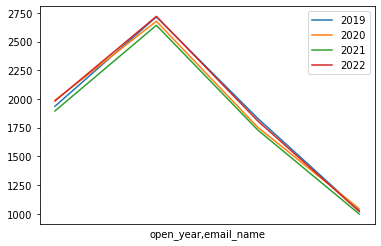

In [71]:
#list Growth Rate
list_growth_2019 = df[df['open_year'] == 2019.0].sort_values(['open_year', 'email_name'], ascending=False).groupby(['open_year', 'email_name'])['name'].count()
list_growth_2020 = df[df['open_year'] == 2020.0].sort_values(['open_year', 'email_name'], ascending=False).groupby(['open_year', 'email_name'])['name'].count()
list_growth_2021 = df[df['open_year'] == 2021.0].sort_values(['open_year', 'email_name'], ascending=False).groupby(['open_year', 'email_name'])['name'].count()
list_growth_2022 = df[df['open_year'] == 2022.0].sort_values(['open_year', 'email_name'], ascending=False).groupby(['open_year', 'email_name'])['name'].count()
list_growth_2019.plot(x='open_year', label='2019')
list_growth_2020.plot(x='open_year', label='2020')
list_growth_2021.plot(x='open_year', label='2021')
list_growth_2022.plot(x='open_year', label='2022')

print(list_growth_2019, list_growth_2020, list_growth_2021, list_growth_2022)
# plt.bar(list_growth)
plt.xticks([])  
plt.legend()
plt.show()

In [70]:
list_growth_2019 = df[df['open_year'] == 2019.0].sort_values(['open_year', 'email_name'], ascending=False).groupby(['open_year', 'email_name'])['name'].count()
printlist_growth_2019

open_year  email_name                                                                
2019.0     Email 1 - Welcome to Wanderlust Adventures                                    1937
           Email 2 - Offers tailored just for you                                        2716
           Email 3 - Don’t miss out on your next adventures, book now and get 20% off    1831
           Email 4 - Thanks for choosing Wanderlust Adventures                           1027
Name: name, dtype: int64

name
Troy Long            2276.00
Ashley Fields        2214.98
Jessica Rivers       2182.44
Michelle Robinson    2061.90
Alicia Lynch         1930.10
Audrey Evans         1757.14
Raven Hughes         1706.43
Brittany Roman       1481.40
Shawn Andrade        1398.58
Holly Rodriguez      1397.31
Catherine Bauer      1396.18
Angela Anderson      1395.85
Michelle Curtis      1394.86
Richard Tucker       1394.70
Ashley Hanson        1394.40
Jean Gregory         1394.30
Sheri Gibbs          1393.89
Olivia Howell        1391.32
Dana Pope            1390.32
Kyle Griffin         1389.34
Gary Baker           1388.20
Cindy Bullock        1385.51
Danielle Bird        1384.00
Isaac Simmons        1381.08
Kelly Gould          1380.36
Name: transaction_amount, dtype: float64


(array([204., 171., 185., 185., 128.,   1.,   2.,   1.,   1.,   3.]),
 array([ 601.92 ,  769.328,  936.736, 1104.144, 1271.552, 1438.96 ,
        1606.368, 1773.776, 1941.184, 2108.592, 2276.   ]),
 <a list of 10 Patch objects>)

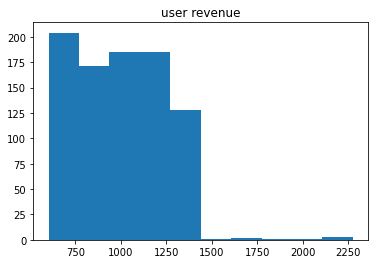

In [79]:
#now lets look at revenue related metrics

#revenue per user 

revbyuser = df[df.transaction_amount > 0].groupby('name')['transaction_amount'].sum().sort_values(ascending=False)
print(revbyuser[:25])
plt.title("user revenue" )
plt.hist(revbyuser, bins=10)

In [59]:
for i in range(len(df.name.unique())):
    temp = df[df.name == df.name.unique()[i]]
    if temp.transaction_amount.sum()  > 0.0:
        
        print(df.name.unique()[i], ': ', temp.transaction_amount.sum() )
# for val, row in df.iterrows():
#     df.name.unique()

Stephen Howard :  613.12
Stanley Mason :  1276.35
William Riley :  1090.88
Breanna Lopez :  838.6
Devin Norman :  768.16
Lisa Shelton :  1035.71
Alexander Perez :  1153.75
Bradley Brown :  1345.49
Anita Holder :  1198.73
Isaiah Stephens :  661.02
Cassandra Duncan :  698.57
Megan Myers :  792.95
Lisa Price :  938.36
James Mcgee :  658.34
Christine Steele :  704.33
Kyle Mcmahon :  1017.26
Jessica Martinez :  1316.57
Ashley Harris :  670.37
Melissa Robinson :  900.05
Douglas Graham :  1328.44
William Cole :  780.65
James Ramos :  701.09
Benjamin Patterson :  948.21
Michael Mendez :  950.56
Anthony Esparza :  1303.63
Brandi King :  693.88
Paul Sawyer :  738.49
Jessica Cooper :  647.37
Emily Grant :  958.62
Daniel Flores :  833.41
Danielle Meyer :  693.81
James Mitchell :  1044.52
Michelle Hill :  1291.25
Anthony Robertson :  668.26
Caroline Cochran :  1151.81
Sherry Singh :  1139.71
Maria Powers :  884.54
Diane Davis :  1315.64
Benjamin Cox :  1120.89
Nicholas Foster :  962.02
Ashley Marti

Amanda Khan :  645.99
Robert Jackson :  1368.16
Misty Rice :  951.66
Robin Allen :  1204.55
Jessica Little :  806.45
Samuel Barnett :  951.64
Peter Thompson :  1115.7
Drew Medina :  1319.9
Ashley Johnson :  978.74
Ronald Cook :  682.09
Mason Lewis :  846.84
Denise Cardenas :  1331.1
Charles Daniel :  673.1
Mr. Benjamin Martin :  888.36
Carlos Sherman :  1081.7
Melinda Young :  1194.08
Michael Clayton :  886.71
William Mason :  958.03
Rebecca Berry :  827.39
Stephen Ashley :  1047.77
Timothy Merritt :  708.87
David Fisher :  667.29
Morgan Scott :  1297.16
Jessica Rivers :  2182.44
Stephanie Morrow :  1151.11
William David :  1098.52
Peter Moore :  1087.83
Aaron Wheeler :  1281.69
Traci Green :  836.75
William Larsen :  946.49
Jacob Garcia :  964.82
Heather Garcia :  642.18
Erica Myers :  1046.02
Robert Wood :  880.4
Mr. Troy Watson :  1238.92
Brian Olson :  648.31
Scott Woodard :  606.03
Jordan Green :  1256.35
Troy Long :  2276.0
Jonathan Rios :  614.37
Natalie Young :  970.65
Andrea A

Patricia Alexander :  1131.42
Daniel Phillips :  709.59
Hannah Hernandez :  914.9
Gina Kelly :  766.14
Kelly Gould :  1380.36
Darren Wheeler :  1272.23
Daniel Aguirre :  1324.53
Stephen Foster :  797.28
Thomas Mitchell :  706.5
Dr. Anthony Barnes PhD :  1019.89
Logan Franklin :  888.26
Michelle Nelson :  1062.74
George Warren :  1229.0
Susan Fletcher :  1046.12
Nathan Warner :  621.22
William Sanders :  781.21
Brian Mosley :  1319.3
Joseph Nguyen :  814.44
Wendy Howell :  672.29
Alex Dorsey :  1210.21
Angelica Middleton :  1175.38
Michelle Murray :  1053.03
Matthew Barrett :  1271.51
Mr. Michael Montgomery :  1218.56
Aaron Brown :  897.8
Sheri Gibbs :  1393.89
Janice Holmes :  810.96
Alan Johnson :  1112.43
Amanda Salinas :  1051.46
Deborah Rollins :  672.54
Justin Figueroa :  754.53
Linda Goodwin :  1137.92
Donald Maldonado :  751.9
Jerry Potter :  1167.9
Kenneth Turner :  682.49
Brian Evans :  728.62
Jacob Cortez :  724.2
Lawrence Graham :  722.4
John Swanson :  701.9
Christine Gray 

In [62]:
#average revenue per recipient
print('average revenue per recipient: ', df.transaction_amount.sum()/df.name.nunique())

average revenue per recipient:  49.01722594329091


In [64]:
#average revenue per email sent
print('average revenue per email: ', df.transaction_amount.sum()/df.name.count())

average revenue per email:  20.86017767642937


In [215]:
#revenue by email 
df.groupby('email_name')['transaction_amount'].sum().sort_values(ascending=False)

email_name
Email 2 - Offers tailored just for you                                        531259.45
Email 1 - Welcome to Wanderlust Adventures                                    177967.20
Email 3 - Don’t miss out on your next adventures, book now and get 20% off    123289.49
Email 4 - Thanks for choosing Wanderlust Adventures                            45676.48
Name: transaction_amount, dtype: float64

In [69]:
#average revenue per email broken out by email template
print('average revenue per email name: ',df.groupby('email_name')['transaction_amount'].sum()/df.name.count())

average revenue per email name:  email_name
Email 1 - Welcome to Wanderlust Adventures                                     4.227350
Email 2 - Offers tailored just for you                                        12.619289
Email 3 - Don’t miss out on your next adventures, book now and get 20% off     2.928561
Email 4 - Thanks for choosing Wanderlust Adventures                            1.084978
Name: transaction_amount, dtype: float64


open_year
2022.0    199869.58
2021.0    187024.14
2019.0    182697.71
2020.0    173078.44
2023.0    135522.75
Name: transaction_amount, dtype: float64


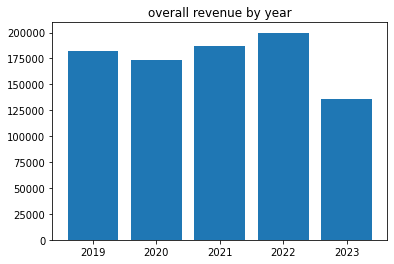

In [74]:
#revenue by year
rev_per_year = df.groupby('open_year')['transaction_amount'].sum().sort_values(ascending=False)
print(rev_per_year)
plt.bar(rev_per_year.keys(), rev_per_year)
plt.title("overall revenue by year")
plt.show()

month
7.0     92876.29
4.0     83891.35
8.0     83010.92
9.0     81612.32
5.0     78498.59
6.0     77294.71
3.0     72205.45
1.0     71708.87
10.0    69534.19
12.0    57929.24
2.0     55885.39
11.0    53745.30
Name: transaction_amount, dtype: float64


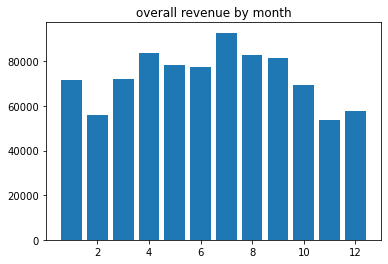

In [77]:
#revenue by month

rev_per_month = df.groupby('month')['transaction_amount'].sum().sort_values(ascending=False)
print(rev_per_month)
plt.bar(rev_per_month.keys(), rev_per_month)
plt.title("overall revenue by month")
plt.show()

In [310]:
#revenue per email by month
df.groupby(['year','month', 'email_name'])['transaction_amount'].sum()


year    month  email_name                                                                
2019.0  1.0    Email 1 - Welcome to Wanderlust Adventures                                      780.65
               Email 2 - Offers tailored just for you                                         3812.28
        2.0    Email 1 - Welcome to Wanderlust Adventures                                     1015.24
               Email 2 - Offers tailored just for you                                         5053.64
               Email 3 - Don’t miss out on your next adventures, book now and get 20% off     2544.37
                                                                                               ...   
2023.0  8.0    Email 2 - Offers tailored just for you                                        15794.64
               Email 3 - Don’t miss out on your next adventures, book now and get 20% off     4041.16
        9.0    Email 1 - Welcome to Wanderlust Adventures                                     

count     893.000000
mean      983.418387
std       240.818800
min         0.000000
25%       777.330000
50%       983.710000
75%      1186.340000
max      1398.580000
Name: transaction_amount, dtype: float64


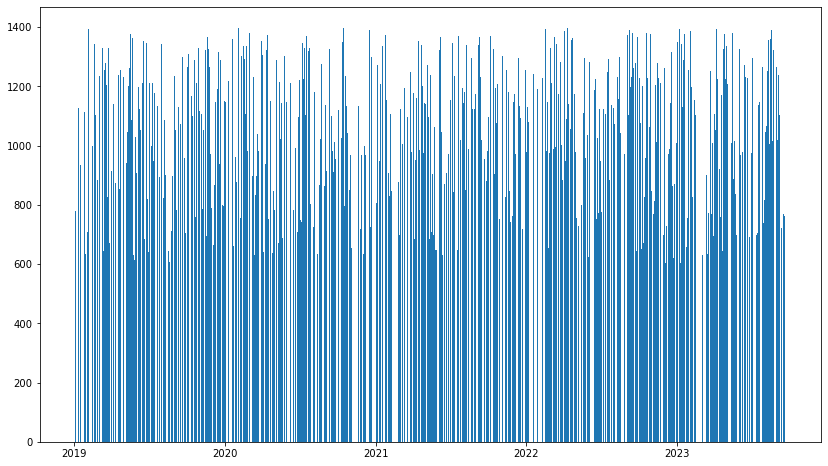

In [333]:
#revenue by day
rev_by_day = df.groupby('transaction_date')['transaction_amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(14,8))
print(rev_by_day.describe())
plt.bar(rev_by_day.keys(), rev_by_day, width=2)
plt.show()

hour
13.0    50098.65
23.0    44617.16
7.0     44344.48
8.0     42898.64
10.0    42865.74
18.0    41446.89
2.0     40348.75
1.0     38389.77
4.0     38057.40
19.0    37890.88
20.0    37698.11
11.0    37308.35
9.0     37122.68
3.0     36904.06
22.0    36736.83
12.0    35737.12
5.0     34316.36
17.0    32672.73
16.0    31890.80
0.0     29728.93
6.0     29258.82
14.0    28916.58
21.0    25309.53
15.0    23633.36
Name: transaction_amount, dtype: float64


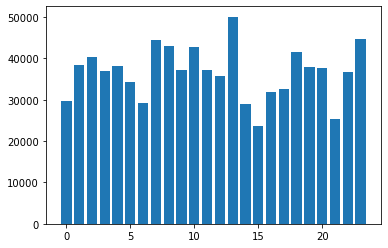

In [335]:
#Revenue by hour

rev_per_year = df.groupby('hour')['transaction_amount'].sum().sort_values(ascending=False)
print(rev_per_year)
plt.bar(rev_per_year.keys(), rev_per_year)
plt.show()

In [339]:
#lets figure out time to open 

df['time_to_open'] = df.open_date - df.sent_date

In [340]:
df.time_to_open.describe()


count                     34832
mean     0 days 00:29:58.249885
std      0 days 00:17:01.564917
min             0 days 00:01:00
25%             0 days 00:15:00
50%             0 days 00:30:00
75%             0 days 00:45:00
max             0 days 00:59:00
Name: time_to_open, dtype: object